In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
print(df[:5])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
X = df.drop("quality", axis=1)

In [5]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df = df.replace({"quality": {8: 1, 7: 1, 6: 0, 5: 0, 4: 0, 3: 0}})

In [7]:
X.corrwith(df['quality'])

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
dtype: float64

**Dropping some features that don't have an effect on the quality of wine.**

In [8]:
x_train = df.drop(["quality", "free sulfur dioxide", "residual sugar", "fixed acidity", "pH", "total sulfur dioxide"], axis=1)
y_train = df["quality"]

In [9]:
x_train[:5]

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol
0,0.70,0.00,0.076,0.9978,0.56,9.4
1,0.88,0.00,0.098,0.9968,0.68,9.8
2,0.76,0.04,0.092,0.9970,0.65,9.8
3,0.28,0.56,0.075,0.9980,0.58,9.8
4,0.70,0.00,0.076,0.9978,0.56,9.4


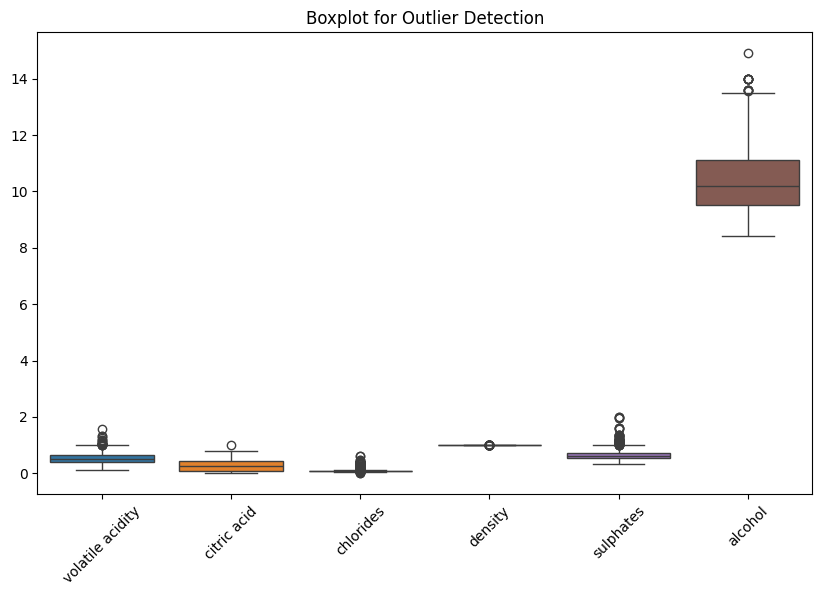

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=x_train)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [11]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(X_scaled, columns=x_train.columns)

In [12]:
X_train[:5]

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol
0,0.72,-0.787879,-0.15,0.469799,-0.333333,-0.50
1,1.44,-0.787879,0.95,0.022371,0.333333,-0.25
2,0.96,-0.666667,0.65,0.111857,0.166667,-0.25
3,-0.96,0.909091,-0.20,0.559284,-0.222222,-0.25
4,0.72,-0.787879,-0.15,0.469799,-0.333333,-0.50


In [13]:
y_train[:5]

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [14]:
y_train.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [15]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [17]:
X_train

array([[ 0.72      , -0.78787879, -0.15      ,  0.46979866, -0.33333333,
        -0.5       ],
       [ 1.44      , -0.78787879,  0.95      ,  0.02237136,  0.33333333,
        -0.25      ],
       [ 0.96      , -0.66666667,  0.65      ,  0.11185682,  0.16666667,
        -0.25      ],
       ...,
       [-0.04      , -0.39393939, -0.15      , -0.45190157,  0.72222222,
         0.5       ],
       [ 0.5       , -0.42424242, -0.2       , -0.57270694,  0.5       ,
         0.        ],
       [-0.84      ,  0.63636364, -0.6       , -0.56375839,  0.22222222,
         0.5       ]])

In [18]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
def logistic_func(w, x, b):
    f_wb = np.dot(x, w) + b

    return 1 / (1 + np.exp(-f_wb))

In [20]:
def compute_cost(w, b, x, y):
    m = x.shape[0]
    y_pred = logistic_func(w, x, b)
    
    L = -np.dot(y, np.log(logistic_func(w, x, b))) - np.dot((1 - y), np.log(1 - logistic_func(w, x, b)))

    return 1/m * np.sum(L)

In [21]:
w = np.random.random(6) * 0.01
b = 1

In [22]:
logistic_func(w, x_train, b)

array([0.74067543, 0.74116789, 0.74121452, ..., 0.74016682, 0.74035181,
       0.74004332])

In [24]:
compute_cost(w, b, x_train, y_train)

np.float64(1.2002193201003024)

In [25]:
def grad_desc(w, b, x, y, alpha):
    m = x.shape[0]
    y_pred = logistic_func(w, x, b)
    error = y_pred - y
    
    dj_dw = 1/m * np.sum(np.dot(x.T, error))
    dj_db = 1/m * np.sum(error)

    w -= alpha * dj_dw
    b -= alpha * dj_db

    return w, b

In [26]:
def logistic_reg(w, b, x, y, alpha, num_epochs):
    for i in range(num_epochs):
        w, b = grad_desc(w, b, x, y, alpha)
        if i % 100000 == 0:
            print("The cost at iteration ", i, " is ", compute_cost(w, b, x, y))

    return w, b

In [27]:
np.random.seed(42)
w = np.random.randn(x_train.shape[1]) * 0.01
b = 0

In [28]:
w, b = logistic_reg(w, b, x_train, y_train, 0.001, 1000000)

The cost at iteration  0  is  0.6712598071756168
The cost at iteration  100000  is  0.4135587576385144
The cost at iteration  200000  is  0.3981538467028956
The cost at iteration  300000  is  0.38538175062791097
The cost at iteration  400000  is  0.37482802907639945
The cost at iteration  500000  is  0.3661181874598665
The cost at iteration  600000  is  0.3589267524759634
The cost at iteration  700000  is  0.35297867714703973
The cost at iteration  800000  is  0.3480460066360919
The cost at iteration  900000  is  0.3439422193858249


In [29]:
def predict(w, x, b):
    y_pred = logistic_func(w, x, b)
    return (y_pred >= 0.5).astype(int)

In [30]:
y_pred = predict(w, x_test, b)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 87.75%
